## This is the Top-Decision tree code for COMP472 A1

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<font color=blue>
Two datasets are loaded: the Penguins dataset and the abalone dataset. The numbers in those dataset will be kept the same, but for the training purpose all the string value will be converted to numbers
</font>  <br>
If there's need to convert the string, two methods will be used:  

- i. convert into 1-hot vectors (also known as dummy-coded data): pandas.get_dummies  

- ii. convert these features into categories: pandas.Categorical  

There are two features(string value) in penguins dataset: 'island' and 'sex'

In [21]:
penguins = pd.read_csv('penguins.csv')
# penguins = pd.get_dummies(penguins, columns=['island', 'sex'], prefix=['island', 'sex'])
penguins['island'] = pd.Categorical(penguins['island']).codes
penguins['sex'] = pd.Categorical(penguins['sex']).codes
#print(penguins)

In Abalone dataset, we check if the features columns contain any non-numerical value. If so, we need to convert it to numbers

In [22]:
abalone = pd.read_csv('abalone.csv')
X_a = abalone.drop('Type', axis=1) #the features column
y_a = abalone['Type'] #the output class column
    
for column in X_a.columns: #check if it's necessary to convert any colume in abalone dataset
    print(f"Column Name: {column} is all numerical?: " + str(pd.api.types.is_numeric_dtype(X_a[column])))


Column Name: LongestShell is all numerical?: True
Column Name: Diameter is all numerical?: True
Column Name: Height is all numerical?: True
Column Name: WholeWeight is all numerical?: True
Column Name: ShuckedWeight is all numerical?: True
Column Name: VisceraWeight is all numerical?: True
Column Name: ShellWeight is all numerical?: True
Column Name: Rings is all numerical?: True


### Split the dataset using train test split using the default parameter values.
The random_state is set to a fixed number to make sure the code will split the dataset the same way every time. If you can remove the random_state variable to make it randomly split each time.

In [23]:
X = penguins.drop('species', axis=1)
y = penguins['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, random_state=42)

### Initialize the array to store the metric values. Those arrays will be used to calculate the average and the variance
We have three in total for each dataset:  
- the average accuracy & the variance  

- average macro-average F1 & the variance  

- average weighted-average F1 & the variance  


In [24]:
#for Penguin dataset:
accuracies = []
macro_f1_scores = []
weighted_f1_scores = []

In [25]:
#for Abalone dataset:
accuracies_a = []
macro_f1_scores_a = []
weighted_f1_scores_a = []

### Create decesion trees with the default parameters and plot the tree:
Create two decision tree instances:

In [26]:
dtc = DecisionTreeClassifier()
dtc_a = DecisionTreeClassifier()

#### Find a better performing Decision Tree found using a gridsearch. Accucary is chosen to evaluate the model. The hyper-parameters to experiment with are:
- criterion: gini or entropy  
- max depth : 2 different values and ”None”   
- min samples split: 3 different values  

#### For penguins dataset:

In [27]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [5, 10, 20] 
}
grid_search = GridSearchCV(dtc, param_grid, scoring='accuracy', cv=5)

#### For Abalone dataset:

In [28]:
param_grid_a = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 25, 50] 
}
grid_search_a = GridSearchCV(dtc_a, param_grid_a, scoring='accuracy', cv=5)

#### This block will be rerun for 5 times to calculate the average metric values in 6.
Training with the Penguins dataset:

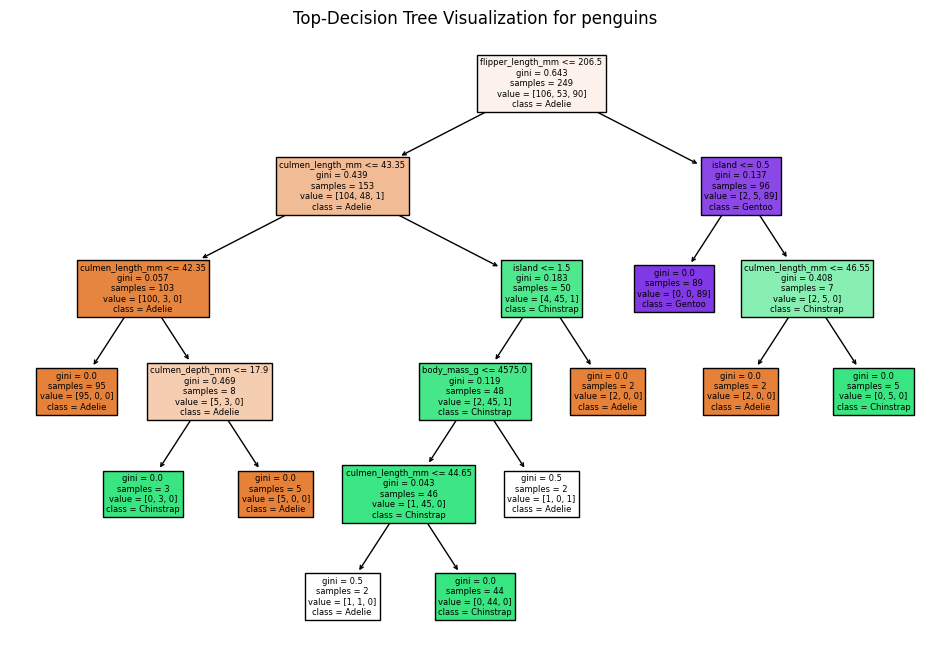

In [51]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

plt.figure(figsize=(12, 8))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=best_dt.classes_)
plt.title("Top-Decision Tree Visualization for penguins")
plt.show()

For abalone dataset, since all the parameters are default and the dataset is big, it's very likely that the tree will be complicated and have the problem of over fitting. For human readability, only part of the tree will be plotted (up to the depth 2)

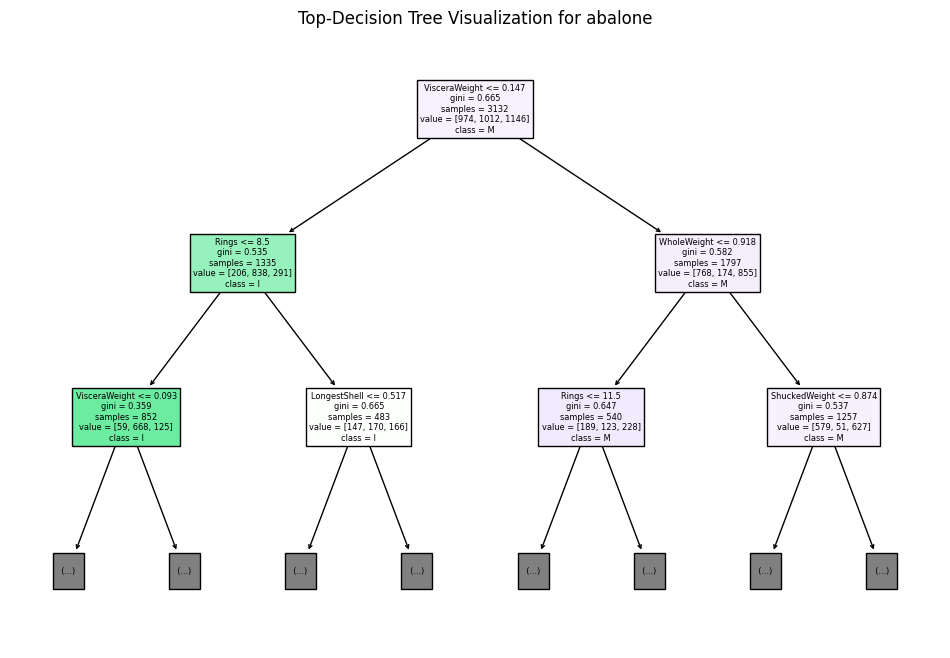

In [84]:
grid_search_a.fit(X_train_a, y_train_a)

best_params_a = grid_search_a.best_params_
best_dt_a = grid_search_a.best_estimator_

plt.figure(figsize=(12, 8))
plot_tree(best_dt_a, filled=True, feature_names=X_a.columns, class_names=best_dt_a.classes_, max_depth=2)
plt.title("Top-Decision Tree Visualization for abalone")
plt.show()

### Using metrics to evaluate the performance of the model, store the performance in strings which will be written to the performance files:
- penguin-performance.txt   
- abalone-performance.txt

#### The performance files contain:
- (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model
- (B) the confusion matrix  
- (C) the precision, recall, and F1-measure for each class  
- (D) the accuracy, macro-average F1 and weighted-average F1 of the model  

#### For the penguins dataset:


In [52]:
y_pred = best_dt.predict(X_test) #get the prediction
# (A) Model Information
model_info = "Top Decision Tree for Penguins(Hyperparameters found by grid search)"
for key in best_params:
    model_info= model_info+'\n'+key+': '+str(best_params[key])

separator = '-' * 40  # Separator
model_info_output = f"{separator}\n(A) {model_info}\n{separator}"

# (B) Confusion Matrix
unique_labels = np.unique(np.concatenate((y_test, y_pred)))  #I tested, the order of values matches with confusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(confusion, index=unique_labels, columns=unique_labels)
confusion_output = f"\n(B) Confusion Matrix for Penguins:\n{confusion_df}\n{separator}"

# (C) Precision, Recall, and F1-measure for each class
classification_rep = classification_report(y_test, y_pred)
classification_rep_output = f"\n(C) Precision, Recall, and F1-measure for Penguins:\n{classification_rep}\n{separator}"

# (D) Accuracy, Macro-average F1, and Weighted-average F1
accuracy = accuracy_score(y_test, y_pred)
macro_f1 = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
weighted_f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
performance_output = f"\n(D) Accuracy for Penguins: {accuracy}\nMacro-average F1: {macro_f1}\nWeighted-average F1: {weighted_f1}\n{separator}"

#### For penguins: Print the performance information that will be writtin into txt file:

In [53]:
print(model_info_output)
print(confusion_output)
print(classification_rep_output)
print(performance_output)

----------------------------------------
(A) Top Decision Tree for Penguins(Hyperparameters found by grid search)
criterion: gini
max_depth: 5
min_samples_split: 5
----------------------------------------

(B) Confusion Matrix for Penguins:
           Adelie  Chinstrap  Gentoo
Adelie         39          1       0
Chinstrap       1         14       0
Gentoo          0          0      29
----------------------------------------

(C) Precision, Recall, and F1-measure for Penguins:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.93      0.93      0.93        15
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84

----------------------------------------

(D) Accuracy for Penguins: 0.9761904761904762
Macro-average F1: 0.9694444444444444
Weighted-av

#### For penguins: Write the performance into the txt file:

In [54]:
with open('penguin-performance.txt', 'a') as performance_file:
    performance_file.write(model_info_output)
    performance_file.write(confusion_output)
    performance_file.write(classification_rep_output)
    performance_file.write(performance_output)

#### For penguins: Calculate the avarage metric values and the variance

In [55]:
accuracies.append(accuracy)
macro_f1_scores.append(macro_f1)
weighted_f1_scores.append(weighted_f1)

In [56]:
print(accuracies)
print(macro_f1_scores)
print(weighted_f1_scores)

avg_accuracy = np.mean(accuracies)
variance_accuracy = np.var(accuracies)

avg_macro_f1 = np.mean(macro_f1_scores)
variance_macro_f1 = np.var(macro_f1_scores)

avg_weighted_f1 = np.mean(weighted_f1_scores)
variance_weighted_f1 = np.var(weighted_f1_scores)

[0.9880952380952381, 0.9761904761904762, 0.9880952380952381, 0.9761904761904762, 0.9761904761904762]
[0.9843905207889883, 0.9694444444444444, 0.9843905207889883, 0.9694444444444444, 0.9694444444444444]
[0.9879634697642361, 0.9761904761904762, 0.9879634697642361, 0.9761904761904762, 0.9761904761904762]


#### For penguins: Attach the avarage metric values and the variance to the performance file

In [58]:
results=[]
results.append({
    'Metric': 'Average Accuracy',
    'Value': avg_accuracy,
    'Variance': variance_accuracy
})
results.append({
    'Metric': 'Average Macro-average F1',
    'Value': avg_macro_f1,
    'Variance': variance_macro_f1
})
results.append({
    'Metric': 'Average Weighted-average F1',
    'Value': avg_weighted_f1,
    'Variance': variance_weighted_f1
})

results_df = pd.DataFrame(results)
results_output = f"\n(E) Top-DT Average Performance for Penguins:\n{results_df}\n{separator}"
with open('penguin-performance.txt', 'a') as performance_file:
    performance_file.write(results_output)

#### For the Abalone dataset:

In [86]:
y_pred_a = best_dt_a.predict(X_test_a)
# (A) Model Information
hyperparameters_a = best_dt_a.get_params()
model_info_a = "Top-Decision Tree for abalone(Hyperparameters found by grid Search)"
for key in best_params_a:
    model_info_a= model_info_a+'\n'+key+': '+str(best_params_a[key])

separator = '-' * 40  # Separator
model_info_output_a = f"{separator}\n(A) {model_info_a}\n{separator}"

# (B) Confusion Matrix
unique_labels_a = np.unique(np.concatenate((y_test_a, y_pred_a))) #I tested, the order of values matches with confusion matrix
confusion_a = confusion_matrix(y_test_a, y_pred_a) 
confusion_df_a = pd.DataFrame(confusion_a, index=unique_labels_a, columns=unique_labels_a)
confusion_output_a = f"\n(B) Confusion Matrix for Abalone:\n{confusion_df_a}\n{separator}"

# (C) Precision, Recall, and F1-measure for each class
classification_rep_a = classification_report(y_test_a, y_pred_a)
classification_rep_output_a = f"\n(C) Precision, Recall, and F1-measure for Abalone:\n{classification_rep_a}\n{separator}"

# (D) Accuracy, Macro-average F1, and Weighted-average F1
accuracy_a = accuracy_score(y_test_a, y_pred_a)
macro_f1_a = classification_report(y_test_a, y_pred_a, output_dict=True)['macro avg']['f1-score']
weighted_f1_a = classification_report(y_test_a, y_pred_a, output_dict=True)['weighted avg']['f1-score']
performance_output_a = f"\n(D) Accuracy for Abalone: {accuracy_a}\nMacro-average F1: {macro_f1_a}\nWeighted-average F1: {weighted_f1_a}\n{separator}"

#### For Abalone: Print the performance information that will be writtin into txt file:

In [87]:
print(model_info_output_a)
print(confusion_output_a)
print(classification_rep_output_a)
print(performance_output_a)

----------------------------------------
(A) Top-Decision Tree for abalone(Hyperparameters found by grid Search)
criterion: gini
max_depth: 5
min_samples_split: 50
----------------------------------------

(B) Confusion Matrix for Abalone:
    F    I    M
F  57   50  226
I  24  251   55
M  49   76  257
----------------------------------------

(C) Precision, Recall, and F1-measure for Abalone:
              precision    recall  f1-score   support

           F       0.44      0.17      0.25       333
           I       0.67      0.76      0.71       330
           M       0.48      0.67      0.56       382

    accuracy                           0.54      1045
   macro avg       0.53      0.53      0.50      1045
weighted avg       0.52      0.54      0.51      1045

----------------------------------------

(D) Accuracy for Abalone: 0.5406698564593302
Macro-average F1: 0.5049861291214777
Weighted-average F1: 0.5069158877037644
----------------------------------------


#### For Abalone: Write the performance into the txt file:

In [88]:
# Append all the information to the text file
with open('abalone-performance.txt', 'a') as performance_file:
    performance_file.write(model_info_output_a)
    performance_file.write(confusion_output_a)
    performance_file.write(classification_rep_output_a)
    performance_file.write(performance_output_a)

#### For Abalone: Calculate the avarage metric values and the variance

In [89]:
accuracies_a.append(accuracy_a)
macro_f1_scores_a.append(macro_f1_a)
weighted_f1_scores_a.append(weighted_f1_a)

In [90]:
print(accuracies_a)
print(macro_f1_scores_a)
print(weighted_f1_scores_a)

avg_accuracy_a = np.mean(accuracies_a)
variance_accuracy_a = np.var(accuracies_a)

avg_macro_f1_a = np.mean(macro_f1_scores_a)
variance_macro_f1_a = np.var(macro_f1_scores_a)

avg_weighted_f1_a = np.mean(weighted_f1_scores_a)
variance_weighted_f1_a = np.var(weighted_f1_scores_a)

[0.5406698564593302, 0.5406698564593302, 0.5406698564593302, 0.5406698564593302, 0.5406698564593302]
[0.5049861291214777, 0.5049861291214777, 0.5049861291214777, 0.5049861291214777, 0.5049861291214777]
[0.5069158877037644, 0.5069158877037644, 0.5069158877037644, 0.5069158877037644, 0.5069158877037644]


#### For Abalone: Attach the avarage metric values and the variance to the performance file

In [91]:
results_a=[]
results_a.append({
    'Metric': 'Average Accuracy',
    'Value': avg_accuracy_a,
    'Variance': variance_accuracy_a
})
results_a.append({
    'Metric': 'Average Macro-average F1',
    'Value': avg_macro_f1_a,
    'Variance': variance_macro_f1_a
})
results_a.append({
    'Metric': 'Average Weighted-average F1',
    'Value': avg_weighted_f1_a,
    'Variance': variance_weighted_f1_a
})

results_df_a = pd.DataFrame(results_a)
results_output_a = f"\n(E) Top-DT Avarage Performance for Abalone:\n{results_df_a}\n{separator}"
with open('abalone-performance.txt', 'a') as performance_file:
    performance_file.write(results_output_a)